<a href="https://colab.research.google.com/github/Mide478/DeepLearning-LatentSpace-StabilityEvaluation/blob/master/AE_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
pip install bayesian-optimization

In [ ]:
pip install shapely

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr  15 14:13:51 2024

@author: jlh7233
@author: aom478
"""
#%% Import required libraries

import numpy as np
import pandas as pd
import random as rand
import copy
import pickle
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import *
from torchvision import datasets
from torchvision import transforms
import anomaly_ls_utils as als

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from scipy.stats import gaussian_kde


from sklearn.metrics import silhouette_score, silhouette_samples, confusion_matrix
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold

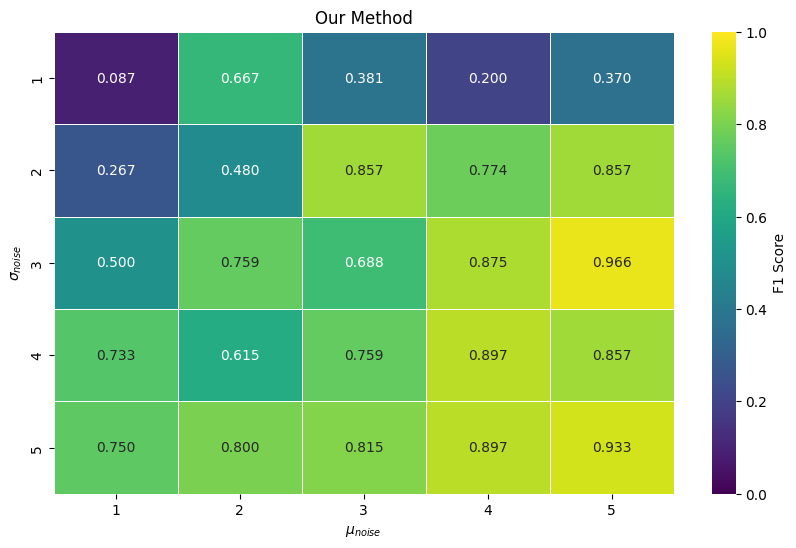

In [ ]:
AE_df_f1 = pd.read_csv('AE_Same_N_f1_scores.csv')
# Pivot the DataFrame to have mean_noise as columns, stdev_noise as rows, and f1_score as values
heatmap_data = AE_df_f1.pivot(index='stdev', columns='mean', values='f1 score')

# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".3f", linewidths=.5, vmin=0.0, vmax=1.0)

# Add a title to the color bar
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('F1 Score')

#Aesthetic
plt.title('Our Method')
plt.xlabel('$\\mu_{noise}$')
plt.ylabel('$\\sigma_{noise}$')
plt.show()